<a href="https://colab.research.google.com/github/gabychoi/comment-clean-bot/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import warnings

warnings.filterwarnings('ignore')

In [111]:
import pandas as pd
import numpy as np 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [112]:
import glob
import re

from tqdm import tqdm_notebook

In [113]:
# 크롤링한 전체 댓글 데이터 불러오기
raw_data = pd.read_csv('/content/gdrive/My Drive/eda_data/repl_data.csv')

# 전체 데이터 개수
len(raw_data)

127125

In [114]:
repl_data = raw_data.drop_duplicates(subset='댓글', keep='first', inplace=False)

# 중복 제거 데이터 개수
len(repl_data)

119000

In [115]:
# 정규표현식 전과 후를 비교하기 위해 세로운 데이터프레임 생성
preprocessing_df = repl_data.copy()
preprocessing_df.head()

,Unnamed: 0,Unnamed: 0.1,댓글,출처
0,0,0,🗣,./data\JTBCNEWS_인스타_댓글_1116.csv
1,1,1,"심각허다,, 법안 검토도 안 하는 의원들 내 세금으로 호의호식 한다 생각하니까 열받...",./data\JTBCNEWS_인스타_댓글_1116.csv
2,2,2,"차도에서 25km제한 둠 어쩌자는건지 자전거 오토바이도 그거보다 빠르다 인도, 차도...",./data\JTBCNEWS_인스타_댓글_1116.csv
3,3,3,국회의원직 다 박탈했으면 좋겠네ㅠㅠ,./data\JTBCNEWS_인스타_댓글_1116.csv
4,4,4,표 얻을 생각 말고 법을 만들어라,./data\JTBCNEWS_인스타_댓글_1116.csv


악성 댓글 필터링 - 라벨2

In [116]:
preprocessing_df = preprocessing_df['댓글']

In [117]:
preprocessing_df = pd.DataFrame(preprocessing_df)
preprocessing_df['악플여부'] = np.NaN
preprocessing_df.head()

,댓글,악플여부
0,🗣,NaN
1,"심각허다,, 법안 검토도 안 하는 의원들 내 세금으로 호의호식 한다 생각하니까 열받...",NaN
2,"차도에서 25km제한 둠 어쩌자는건지 자전거 오토바이도 그거보다 빠르다 인도, 차도...",NaN
3,국회의원직 다 박탈했으면 좋겠네ㅠㅠ,NaN
4,표 얻을 생각 말고 법을 만들어라,NaN


In [118]:
filter_word_df = pd.read_excel('/content/gdrive/My Drive/eda_data/필터링단어.xlsx')

In [119]:
filter_word_df.shape[1]

13

In [120]:
preprocessing_df['댓글'].dropna()

0                                                         🗣
1         심각허다,, 법안 검토도 안 하는 의원들 내 세금으로 호의호식 한다 생각하니까 열받...
2         차도에서 25km제한 둠 어쩌자는건지 자전거 오토바이도 그거보다 빠르다 인도, 차도...
3                                       국회의원직 다 박탈했으면 좋겠네ㅠㅠ
4                                        표 얻을 생각 말고 법을 만들어라
                                ...                        
127120                                           🇧🇻🇰🇷❤️❤️❤️
127121                             이건... 홍마담에서 구입 못하나요? ㅎㅎㅎ
127122                                           느무 잘먹는 예 9
127123                              맛있는건 눈으로만 봐도 알죠,맛있게 드세요
127124                                               👏👏👏😂😂😂
Name: 댓글, Length: 118999, dtype: object

In [121]:
preprocessing_df = preprocessing_df.loc[preprocessing_df['댓글'].notnull(), ]

In [122]:
for col in tqdm_notebook(range(filter_word_df.shape[1])):
    word_list = list(filter_word_df.iloc[:, col])[0].split(', ')
    label = filter_word_df.columns[col][-2]

    for filter_word in tqdm_notebook(word_list):
        preprocessing_df.loc[ preprocessing_df['댓글'].str.match('.*' + filter_word + '.*'), '악플여부' ] = label

In [123]:
# 악플 라벨링된 개수
preprocessing_df.head()

,댓글,악플여부
0,🗣,NaN
1,"심각허다,, 법안 검토도 안 하는 의원들 내 세금으로 호의호식 한다 생각하니까 열받...",NaN
2,"차도에서 25km제한 둠 어쩌자는건지 자전거 오토바이도 그거보다 빠르다 인도, 차도...",NaN
3,국회의원직 다 박탈했으면 좋겠네ㅠㅠ,NaN
4,표 얻을 생각 말고 법을 만들어라,NaN


In [125]:
bad_comment = preprocessing_df[preprocessing_df['악플여부'] == '2']
bad_comment.head()

,댓글,악플여부
103,지랄을 한다!! 역격리 고맙다~~!!,2
119,@dmsgddl 지네때문에 온나라가 지랄낫는데,2
130,짱꺄나 쪽바리나...,2
161,지랄하네,2
174,"지랄한다,미세먼지나 잡아라 중국에 말도 못하면서 말은 잘도 씨부린다.",2


In [ ]:
# 댓글 길이 확인
repl_data['댓글길이'] = repl_data['댓글'].apply(lambda x : len(str(x)))

repl_data['댓글길이'].max()

2229

In [ ]:
# 댓글길이 시각화

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
len_int = repl_data['댓글길이'].astype(int)
len_sort = len_int.sort_values()
sort_df = pd.DataFrame(len_sort)

len_count = pd.DataFrame(sort_df.groupby(['댓글길이']).size())
len_count.columns = ['댓글개수']
len_count



,댓글개수
댓글길이,
1,1468
2,1779
3,1889
4,1669
5,2117
...,...
1931,1
1958,1
2071,1


In [ ]:
len_count.reset_index(level=0, inplace=True)

In [ ]:
len_count

,댓글길이,댓글개수
0,1,1468
1,2,1779
2,3,1889
3,4,1669
4,5,2117
...,...,...
830,1931,1
831,1958,1
832,2071,1
833,2190,1


In [ ]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

Unknown system... sorry~~~~


In [ ]:
import matplotlib as mpl
%matplotlib inline

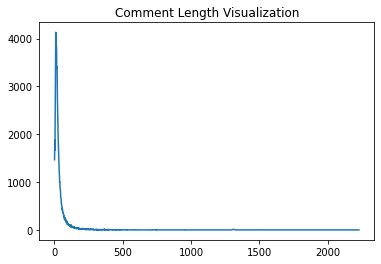

In [ ]:
plt.title('Comment Length Visualization')
plt.plot(len_count['댓글길이'], len_count['댓글개수']) #앞이 x축, 뒤가 y축
# plt.xlabel('댓글길이')
# plt.ylabel('댓글개수')
plt.show()

In [ ]:
len_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   댓글길이    835 non-null    int64
 1   댓글개수    835 non-null    int64
dtypes: int64(2)
memory usage: 13.2 KB


In [ ]:
repl_data

,Unnamed: 0,Unnamed: 0.1,댓글,출처,댓글길이
0,0,0,🗣,./data\JTBCNEWS_인스타_댓글_1116.csv,1
1,1,1,"심각허다,, 법안 검토도 안 하는 의원들 내 세금으로 호의호식 한다 생각하니까 열받...",./data\JTBCNEWS_인스타_댓글_1116.csv,66
2,2,2,"차도에서 25km제한 둠 어쩌자는건지 자전거 오토바이도 그거보다 빠르다 인도, 차도...",./data\JTBCNEWS_인스타_댓글_1116.csv,137
3,3,3,국회의원직 다 박탈했으면 좋겠네ㅠㅠ,./data\JTBCNEWS_인스타_댓글_1116.csv,19
4,4,4,표 얻을 생각 말고 법을 만들어라,./data\JTBCNEWS_인스타_댓글_1116.csv,18
...,...,...,...,...,...
127120,968,968,🇧🇻🇰🇷❤️❤️❤️,./data\홍석천.csv,10
127121,969,969,이건... 홍마담에서 구입 못하나요? ㅎㅎㅎ,./data\홍석천.csv,24
127122,970,970,느무 잘먹는 예 9,./data\홍석천.csv,10
127123,971,971,"맛있는건 눈으로만 봐도 알죠,맛있게 드세요",./data\홍석천.csv,23


In [ ]:
# 댓글길이 300이상 500이하
repl_data = repl_data[(repl_data['댓글길이'] <= 500) & (repl_data['댓글길이'] >= 300)]
repl_data

,Unnamed: 0,Unnamed: 0.1,댓글,출처,댓글길이
20,20,20,화재는 원인 조사를 통한 예방이 최선입니다 그래도 소방청 통계로 매일 발생하는 화재...,./data\JTBCNEWS_인스타_댓글_1116.csv,444
21,21,21,다들 비슷한 경험을 하실겁니다 오작동 화재감지기 덕에 스프링클러 연동 차단하고(화재...,./data\JTBCNEWS_인스타_댓글_1116.csv,369
23,23,23,문재인 대통령님 화재시 반복되는 연기와 유독가스에 의한 질식사가 전체 사망자의 70...,./data\JTBCNEWS_인스타_댓글_1116.csv,426
616,616,616,"본 언론사의 기사에서 아르메니아인들이 한국으로 부터 도움을 구하고 있으며, 방탄소년...",./data\JTBCNEWS_인스타_댓글_1116.csv,365
617,617,617,"본 언론사의 기사에서 아르메니아인들이 한국으로 부터 도움을 구하고 있으며, 방탄소년...",./data\JTBCNEWS_인스타_댓글_1116.csv,365
...,...,...,...,...,...
124827,458,458,다들 방송이란게 그렇습니다. 다그대로 찍는다고 방송마음대로 다 그대로 내보내지 않아...,./data\함소원.csv,349
125068,699,699,일을 조금이라도 줄이시고 혜정이와 함께하는 시간을 좀 더 늘리는게 어떨까요? 돈도 ...,./data\함소원.csv,400
125073,704,704,음.. 저도 아기엄마지만 일하면서 키우는데 다른건 몰라도 아이 아플땐 엄마 밖에 없...,./data\함소원.csv,319
126620,468,468,제이야기를 해볼까 합니다 저는 지금호흡기2급 장애를 가지고 살아가고 있습니다 199...,./data\홍석천.csv,327


In [ ]:
len_int = repl_data['댓글길이'].astype(int)
len_sort = len_int.sort_values()
sort_df = pd.DataFrame(len_sort)

len_count = pd.DataFrame(sort_df.groupby(['댓글길이']).size())
len_count.columns = ['댓글개수']
len_count


,댓글개수
댓글길이,
300,11
301,7
302,5
303,7
304,7
...,...
496,2
497,2
498,3


In [ ]:
len_count.reset_index(level=0, inplace=True)

In [ ]:
len_count.head()

,댓글길이,댓글개수
0,300,11
1,301,7
2,302,5
3,303,7
4,304,7
...,...,...
188,496,2
189,497,2
190,498,3
191,499,1


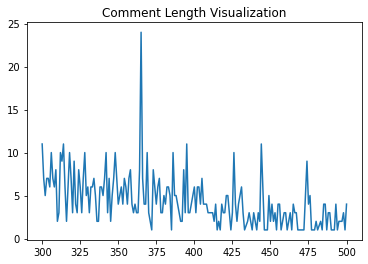

In [ ]:
plt.title('Comment Length Visualization')
plt.plot(len_count['댓글길이'], len_count['댓글개수']) #앞이 x축, 뒤가 y축
# plt.xlabel('댓글길이')
# plt.ylabel('댓글개수')
plt.show()

In [ ]:
# 악플 댓글 길이 시각화
dict_label = pd.read_csv('/content/gdrive/My Drive/eda_data/dict_label.csv')

In [ ]:
dict_label['댓글길이'] = dict_label['댓글'].apply(lambda x : len(str(x)))

In [ ]:
# 악플 최대 댓글 길이
dict_label['댓글길이'].max()

385

In [47]:
dict_label.head()
dict_bad = dict_label[(dict_label['악플여부'] == 2) | (dict_label['악플여부'] == 1)]
dict_bad

,Unnamed: 0,댓글,악플여부,출처,댓글길이
0,75,지랄을 한다 역격리 고맙다,2,./data\JTBCNEWS_인스타_댓글_1116.csv,14
1,86,지네때문에 온나라가 지랄낫는데,2,./data\JTBCNEWS_인스타_댓글_1116.csv,16
2,95,짱꺄나 쪽바리나,1,./data\JTBCNEWS_인스타_댓글_1116.csv,8
3,122,지랄한다미세먼지나 잡아라 중국에 말도 못하면서 말은 잘도 씨부린다,2,./data\JTBCNEWS_인스타_댓글_1116.csv,36
4,178,아무리 내새끼라도 다리병신 만들어버렸을듯,2,./data\JTBCNEWS_인스타_댓글_1116.csv,22
...,...,...,...,...,...
8578,89851,진짜 ㅋㅋㅋ 댓글 지우는거 보소참 성격 병신 맞가,2,./data\함소원.csv,27
8579,90081,진짜 대박이다언니힘내세요그냥이럴때 공인이고 모고 다 뒤로하시고 사이다 날려요저런애들...,1,./data\함소원.csv,71
8580,90946,올바른길이란게 정해지지않는듯오빠가 열심히하시고 즐겁게 시간보내는것이 오빠만의 길인듯...,1,./data\홍석천.csv,84
8581,91211,석천오빠님사랑해요 레스토랑 한번 가본 촌년이지만행복한 기억이였고늘 오빠가 잘 되길 ...,1,./data\홍석천.csv,57


In [53]:
dict_int = dict_bad['댓글길이'].astype(int)
dict_int
dict_sort = dict_int.sort_values()
dict_df = pd.DataFrame(dict_sort)
dict_df
dict_count = pd.DataFrame(dict_df.groupby(['댓글길이']).size())
dict_count


,0
댓글길이,
4,7
5,33
6,40
7,95
8,87
...,...
366,1
369,1
373,1


In [54]:
dict_count.columns = ['댓글개수']
dict_count.head()

,댓글개수
댓글길이,
4,7
5,33
6,40
7,95
8,87


In [55]:
dict_count.reset_index(level=0, inplace=True)
dict_count.head()

,댓글길이,댓글개수
0,4,7
1,5,33
2,6,40
3,7,95
4,8,87


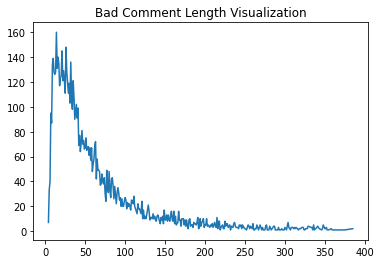

In [60]:
plt.title('Bad Comment Length Visualization')
plt.plot(dict_count['댓글길이'], dict_count['댓글개수']) #앞이 x축, 뒤가 y축
# plt.xlabel('댓글길이')
# plt.ylabel('댓글개수')
plt.show()

In [ ]:
# 우리가 만든 악플 뭉치로 라벨링 시각화

In [109]:
dict_label2 = pd.read_csv('/content/gdrive/My Drive/eda_data/dict_label.csv')
dict_label2 = dict_label.groupby(['악플여부']).size()
dict_label2_df = pd.DataFrame(dict_label2)
dict_label2_df.columns = ['개수']
dict_label2_df.head()

,개수
악플여부,
1,2620
2,5963


In [110]:
dict_label2_df.index = ['악성위험댓글(1)', '악성댓글(2)']
dict_label2_df.head()

,개수
악성위험댓글(1),2620
악성댓글(2),5963


In [112]:
dict_label2_df.reset_index(level=0, inplace=True)

In [115]:
dict_label2_df.columns = ['댓글분류', '개수']
dict_label2_df.head()

,댓글분류,개수
0,악성위험댓글(1),2620
1,악성댓글(2),5963


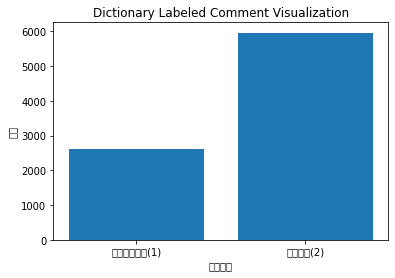

In [116]:
plt.title('Dictionary Labeled Comment Visualization')
plt.bar(dict_label2_df['댓글분류'], dict_label2_df['개수']) #앞이 x축, 뒤가 y축
plt.xlabel('댓글분류')
plt.ylabel('개수')
plt.show()

In [92]:
# 우리가 직접 라벨링 후 EDA
human_label = pd.read_csv('/content/gdrive/My Drive/eda_data/human_label.csv')
label_count = human_label.groupby(['악플여부']).size()
label_count_df = pd.DataFrame(label_count)
label_count_df.columns = ['개수']
label_count_df.head()

,개수
악플여부,
0.0,67399
1.0,5620
2.0,8262


In [93]:
label_count_df.index = ['일반댓글(0)', '악성위험댓글(1)', '악성댓글(2)']
label_count_df.head()

,개수
일반댓글(0),67399
악성위험댓글(1),5620
악성댓글(2),8262


In [94]:
# 인덱스 조정
label_count_df.reset_index(level=0, inplace=True)

In [98]:
label_count_df.columns = ['댓글분류', '개수']
label_count_df.head()

,댓글분류,개수
0,일반댓글(0),67399
1,악성위험댓글(1),5620
2,악성댓글(2),8262


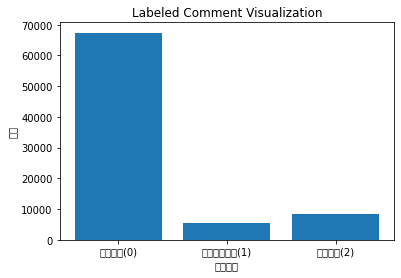

In [105]:
plt.title('Labeled Comment Visualization')
plt.bar(label_count_df['댓글분류'], label_count_df['개수']) #앞이 x축, 뒤가 y축
plt.xlabel('댓글분류')
plt.ylabel('개수')
plt.show()